In [1]:
#Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [5]:
data.duplicated().sum()

0

In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,200.0,NaN,NaN,NaN,100.5,57.879185,1.0,50.75,100.5,150.25,200.0
Gender,200,2,Female,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,200.0,NaN,NaN,NaN,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,NaN,NaN,NaN,60.56,26.264721,15.0,41.5,61.5,78.0,137.0
Spending Score (1-100),200.0,NaN,NaN,NaN,50.2,25.823522,1.0,34.75,50.0,73.0,99.0


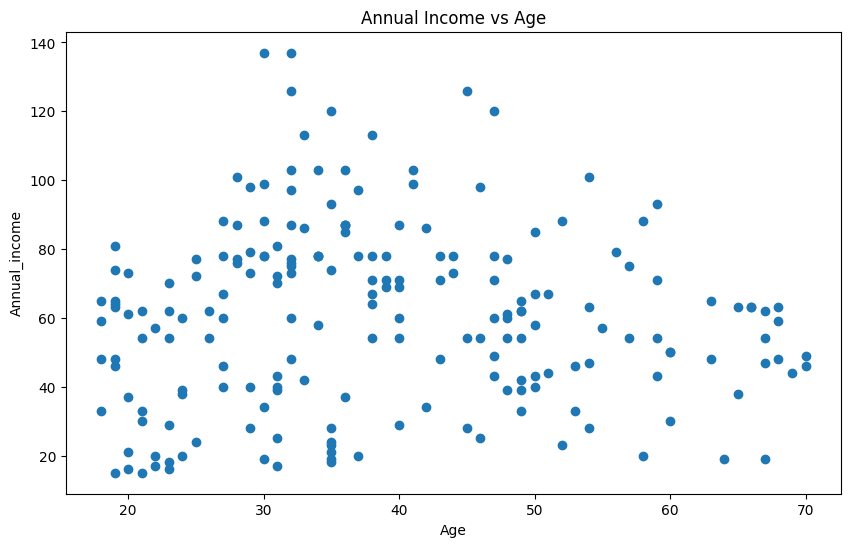

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(x = data['Age'], y=data['Annual Income (k$)'])
plt.title('Annual Income vs Age')
plt.xlabel('Age')
plt.ylabel('Annual_income')
plt.show()

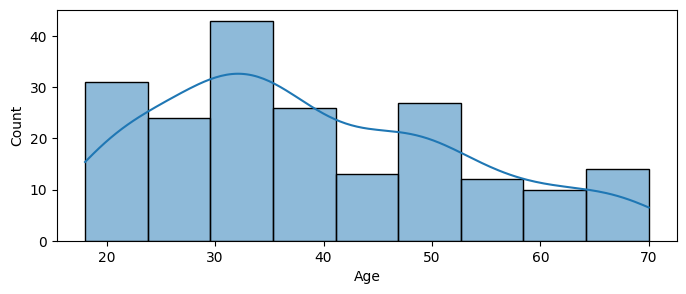

In [8]:
plt.figure(figsize=(8,3))
sns.histplot(data['Age'],kde=True)
plt.show()

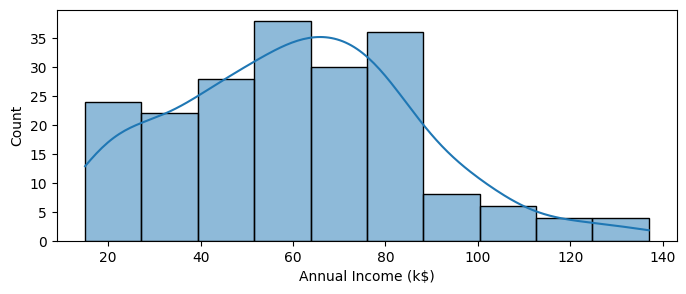

In [9]:
plt.figure(figsize=(8,3))
sns.histplot(data['Annual Income (k$)'],kde=True)
plt.show()

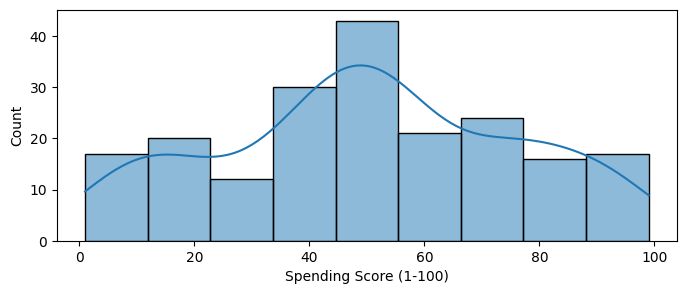

In [10]:
plt.figure(figsize=(8,3))
sns.histplot(data['Spending Score (1-100)'],kde=True)
plt.show()

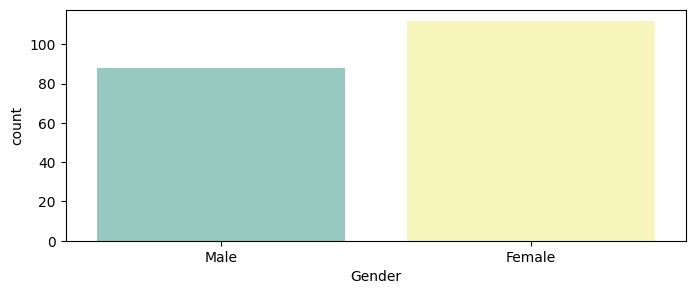

In [11]:
plt.figure(figsize=(8,3))
sns.countplot(x=data["Gender"],palette="Set3")
plt.show()

[]

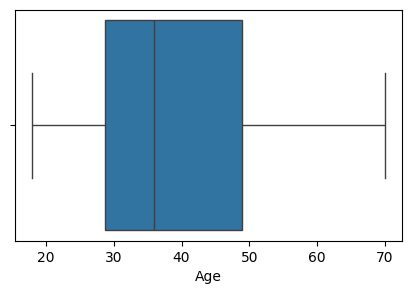

In [12]:
plt.figure(figsize=(5,3))
sns.boxplot(x=data["Age"])
plt.plot()

[]

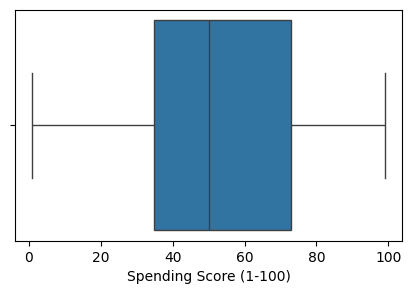

In [13]:
plt.figure(figsize=(5,3))
sns.boxplot(x=data["Spending Score (1-100)"])
plt.plot()

[]

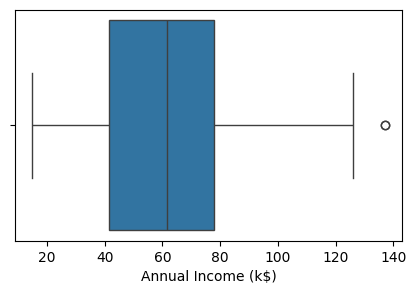

In [14]:
plt.figure(figsize=(5,3))
sns.boxplot(x=data["Annual Income (k$)"])
plt.plot()

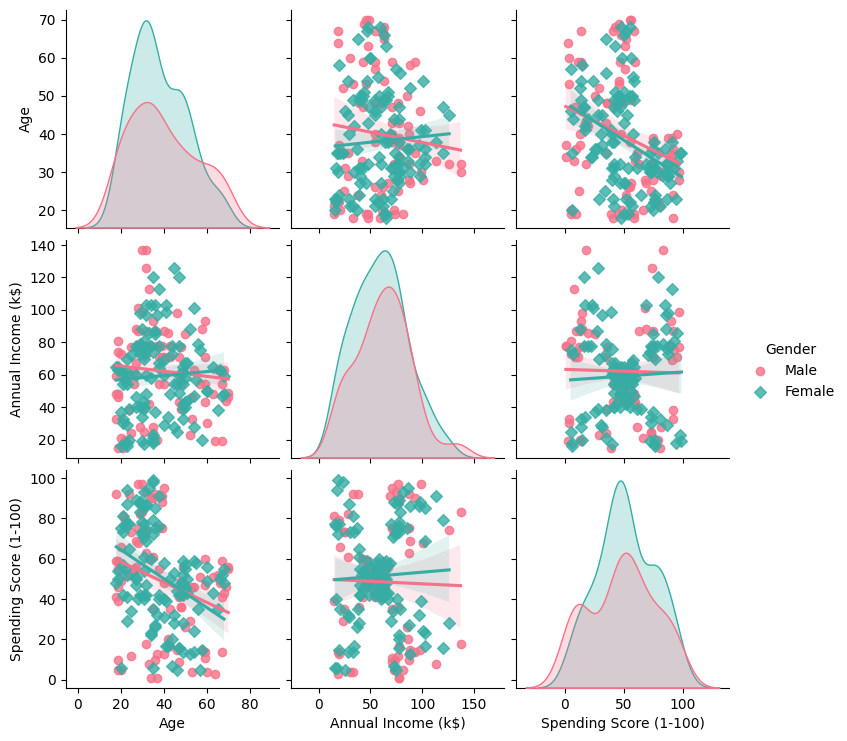

In [15]:
sns.pairplot(data, vars=["Age", "Annual Income (k$)", "Spending Score (1-100)"],  kind ="reg", hue = "Gender", palette="husl", markers = ['o','D'])

In [16]:
data.drop(columns='CustomerID',axis=1,inplace=True)

In [17]:
data = pd.get_dummies(data).reset_index(drop=True)

In [18]:
data.sample(3)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
51,33,42,60,False,True
62,67,47,52,True,False
126,43,71,35,False,True


In [19]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [20]:
data_scaled

array([[-1.42456879, -1.73899919, -0.43480148, -1.12815215,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407, -1.12815215,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783,  0.88640526, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992,  0.88640526, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627,  0.88640526, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436,  0.88640526, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767, -1.12815215,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002,  0.88640526, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 , -1.12815215,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216,  0.88640526, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894,  0.88640526, -0.88640526],
       [-1.06573534, -1.54815205,  1.0

In [23]:
inertia = []
for i in range(1,15):
  kmean = KMeans(n_clusters=i,init="k-means++")
  kmean.fit(data_scaled)
  inertia.append(kmean.inertia_)

In [24]:
inertia

[1000.0000000000003,
 597.9472937932284,
 488.1952688524801,
 388.7654342841471,
 341.8518897368964,
 315.00035323500674,
 239.27635836181307,
 199.81861761323984,
 205.25905825367565,
 188.52395054344473,
 168.6514355197094,
 133.5696482558468,
 117.6866411172421,
 119.11411516158003]

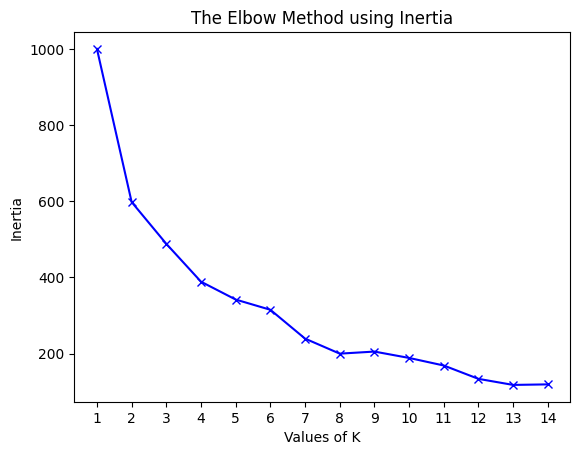

In [25]:
plt.plot(range(1,15),inertia,'bx-')
plt.xticks(range(1,15))
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [26]:
# apply kmeans algorithm
kmeans_model=KMeans(n_clusters=6,init='k-means++')
kmeans_clusters = kmeans_model.fit_predict(data_scaled)

In [27]:
kmeans_clusters

array([2, 2, 0, 4, 0, 4, 0, 4, 3, 4, 3, 4, 0, 4, 2, 2, 0, 2, 3, 4, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 4, 3, 4, 3, 2, 0, 4, 0, 4, 0, 4, 0, 2, 3, 4,
       0, 4, 0, 4, 4, 4, 0, 2, 4, 3, 0, 3, 0, 3, 4, 3, 3, 2, 0, 0, 3, 2,
       0, 0, 2, 4, 3, 0, 0, 0, 3, 2, 0, 2, 4, 0, 3, 2, 3, 0, 4, 3, 0, 4,
       4, 0, 0, 2, 3, 0, 4, 2, 0, 4, 3, 2, 4, 0, 3, 2, 3, 4, 0, 3, 3, 3,
       3, 4, 0, 2, 4, 4, 0, 0, 0, 0, 2, 0, 4, 1, 4, 4, 5, 1, 3, 1, 5, 1,
       4, 4, 5, 4, 0, 1, 5, 4, 0, 1, 4, 4, 5, 1, 5, 4, 0, 1, 5, 1, 0, 4,
       0, 4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 0, 1, 5, 1, 5, 1, 0, 4,
       5, 1, 5, 1, 0, 4, 5, 4, 0, 1, 0, 1, 0, 4, 0, 4, 5, 4, 0, 4, 0, 1,
       5, 1], dtype=int32)

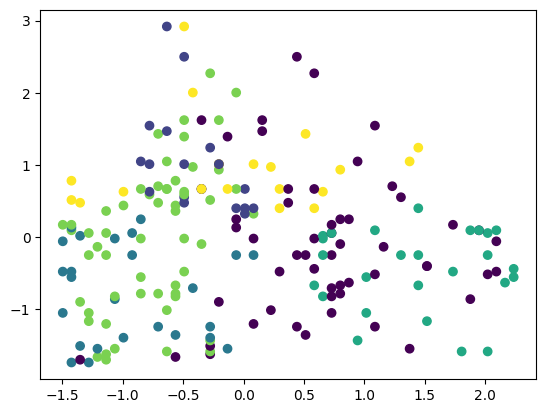

In [28]:
plt.scatter(data_scaled[:,0],data_scaled[:,1],c=kmeans_clusters)

In [29]:
#Knee Locator
!pip install kneed

In [30]:
from kneed import KneeLocator
k1 = KneeLocator(range(1,15),inertia,curve='convex',direction='decreasing')
k1.elbow

7

In [31]:
#Silhouttle Scoring

from sklearn.metrics import silhouette_score
silhouette_coefficient = []
for i in range(2,15):
  kmeans = KMeans(n_clusters=i,init='k-means++')
  kmeans.fit_predict(data_scaled)
  score = silhouette_score(data_scaled,kmeans.labels_)
  silhouette_coefficient.append(score)

In [32]:
silhouette_coefficient

[0.39644160577705434,
 0.31127230821174584,
 0.3049100149190128,
 0.33838326904153815,
 0.36229217049552515,
 0.376397613553458,
 0.3844295004373274,
 0.40515919919970644,
 0.41113978707159626,
 0.3951989534184883,
 0.3997719476160334,
 0.40482741495706037,
 0.41890902665824514]

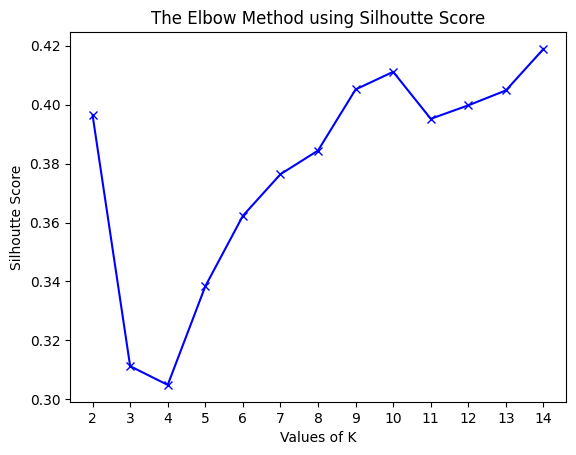

In [33]:
plt.plot(range(2,15),silhouette_coefficient,'bx-')
plt.xticks(range(2,15))
plt.xlabel('Values of K')
plt.ylabel('Silhoutte Score')
plt.title('The Elbow Method using Silhoutte Score')
plt.show()